## Hi, myself Raksha Prasad

## I am an intern at the Sparks foundation #GripSept21 (IoT and Computer Vision)

## I have succesfully completed Task 1 (Object detection)

## Here is the snippet of it!






## OBJECT DETECTION 

In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='frozen_inference_graph.pb'

In [4]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [5]:
classLabels=[]
file_name='Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels= fpt.read().rstrip('\n').split('\n')
    

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'horse', 'cat', 'dog', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classLabels))

80


In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) ##255/2=127.5
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 000001B8CBEF9290>

# Read an image

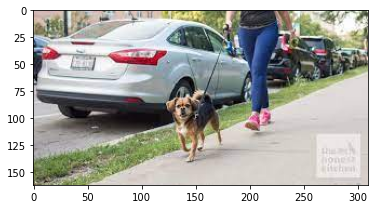

In [9]:
img=cv2.imread('dog-walking.jpg')
plt.imshow(img) ##bgr
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [10]:
ClassIndex,confidece,bbox=model.detect(img,confThreshold=0.5)

In [11]:
print(ClassIndex)

[[18]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 1]]


In [12]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 2)
    cv2.putText(img, classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0, 255, 0), thickness=3)

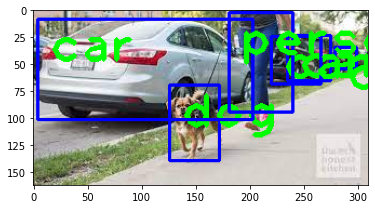

In [13]:
# plt.imshow for to plot identified objects in image

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))




## Video Demo

In [14]:
cap = cv2.VideoCapture("traffic-mini.mp4")

## check if video is opened correctly 

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot open video")
    
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()

    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)

    print(ClassIndex)
    if (len(ClassIndex) != 0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font,fontScale=font_scale, color=(0, 255, 0), thickness=3)
    cv2.imshow('Object Detection ', frame)

    if cv2.waitKey(2) & 0XFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

[[6]
 [6]
 [6]
 [3]
 [3]
 [1]]
[[6]
 [6]
 [6]
 [3]
 [3]
 [1]
 [1]]
[[6]
 [6]
 [6]
 [3]
 [3]
 [1]]
[[6]
 [6]
 [6]
 [3]
 [3]
 [1]]
[[6]
 [6]
 [6]
 [3]
 [3]
 [1]]
[[6]
 [6]
 [6]
 [3]
 [3]
 [1]]
[[6]
 [6]
 [6]
 [3]
 [3]
 [1]]
[[6]
 [6]
 [6]
 [1]
 [1]]
[[6]
 [6]
 [6]
 [1]
 [1]
 [3]]
[[6]
 [6]
 [6]
 [1]
 [1]]
[[6]
 [6]
 [6]
 [1]
 [1]]
[[6]
 [6]
 [6]
 [1]
 [1]]
[[6]
 [6]
 [6]
 [1]
 [1]
 [3]]
[[6]
 [6]
 [6]
 [1]]
[[6]
 [6]
 [6]
 [1]
 [3]
 [3]]
[[6]
 [6]
 [6]
 [6]
 [1]
 [3]]
[[6]
 [6]
 [6]
 [1]
 [6]
 [3]]
[[6]
 [6]
 [6]
 [6]
 [1]
 [3]]
[[6]
 [6]
 [6]
 [6]
 [1]
 [3]]
[[6]
 [6]
 [6]
 [6]
 [1]
 [3]]
[[6]
 [6]
 [6]
 [3]
 [6]
 [1]]
[[6]
 [6]
 [6]
 [3]
 [1]
 [6]]
[[6]
 [6]
 [6]
 [3]
 [1]
 [6]]
[[6]
 [6]
 [6]
 [3]
 [6]
 [1]
 [6]]
[[6]
 [6]
 [6]
 [6]
 [3]
 [1]
 [1]]
[[6]
 [6]
 [6]
 [3]
 [1]
 [6]
 [1]]
[[6]
 [6]
 [6]
 [1]
 [1]
 [3]
 [8]
 [6]
 [6]]
[[6]
 [6]
 [6]
 [1]
 [1]
 [6]
 [3]
 [1]
 [8]
 [6]]
[[6]
 [6]
 [6]
 [1]
 [6]
 [8]
 [3]]
[[6]
 [6]
 [6]
 [1]
 [6]
 [8]
 [3]]
[[6]
 [6]
 [6]
 [1]
 [6]
 [3]]
[[6]

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-q3d_8t8e\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
